In [15]:
import os
import torch
from torch import nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        layer1 = nn.Linear(28 * 28, 300, bias=False)
        # nn.init.uniform_(layer1.weight, 0, 0)
        layer2 = nn.Linear(300, 200, bias=False)
        # nn.init.uniform_(layer2.weight, 0, 0)
        layer3 = nn.Linear(200, 10, bias=False)
        # nn.init.uniform_(layer3.weight, 0, 0)

        self.linear_stack = nn.Sequential(
            layer1,
            nn.Sigmoid(),
            layer2,
            nn.Sigmoid(),
            layer3,
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return f.softmax(logits, dim=1)

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [18]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=False)
    (1): Sigmoid()
    (2): Linear(in_features=300, out_features=200, bias=False)
    (3): Sigmoid()
    (4): Linear(in_features=200, out_features=10, bias=False)
  )
)


In [21]:
train_set = datasets.MNIST("data", download=True, train=True, transform=ToTensor())
test_set = datasets.MNIST("data", download=True, train=False, transform=ToTensor())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [23]:
learning_rate = 0.1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.359588  [  128/60000]
loss: 2.343963  [12928/60000]
loss: 2.351776  [25728/60000]
loss: 2.390838  [38528/60000]
loss: 2.343963  [51328/60000]
Test Error: 
 Accuracy: 9.7%, Avg loss: 2.363619 

Epoch 2
-------------------------------
loss: 2.351776  [  128/60000]
loss: 2.390838  [12928/60000]
loss: 2.375213  [25728/60000]
loss: 2.343963  [38528/60000]
loss: 2.351776  [51328/60000]
Test Error: 
 Accuracy: 9.7%, Avg loss: 2.363619 

Epoch 3
-------------------------------
loss: 2.343963  [  128/60000]
loss: 2.398651  [12928/60000]
loss: 2.328338  [25728/60000]
loss: 2.414276  [38528/60000]
loss: 2.343963  [51328/60000]
Test Error: 
 Accuracy: 9.7%, Avg loss: 2.363619 

Epoch 4
-------------------------------
loss: 2.336151  [  128/60000]
loss: 2.336151  [12928/60000]


KeyboardInterrupt: 

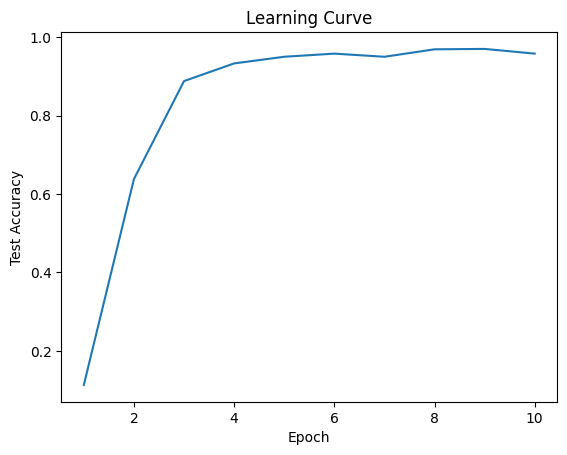

In [ ]:
plt.title('Learning Curve')
plt.plot(range(1, 11), [.113, .638, .888, .933, .95, .958, .95, .969, .97, .958])
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.show()

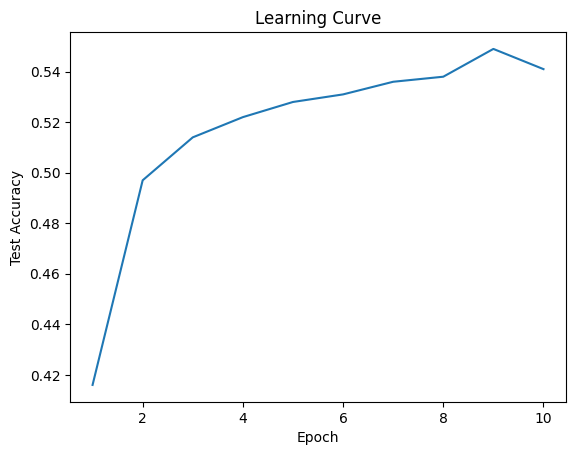

In [ ]:
plt.title('Learning Curve')
plt.plot(range(1, 11), [.416, .497, .514, .522, .528, .531, .536, .538, .549, .541])
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.show()